【問題1】クロスバリデーション

事前学習期間では検証データをはじめに分割しておき、それに対して指標値を計算することで検証を行っていました。（ホールドアウト法）しかし、分割の仕方により精度は変化します。実践的には クロスバリデーション（交差検証） を行います。分割を複数回行い、それぞれに対して学習と検証を行う方法です。複数回の分割のためにscikit-learnにはKFoldクラスが用意されています。


事前学習期間の課題で作成したベースラインモデルに対してKFoldクラスによるクロスバリデーションを行うコードを作成し実行してください。


sklearn.model_selection.KFold — scikit-learn 0.21.3 documentation

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [4]:
import csv

df = pd.read_csv('/content/drive/My Drive/application_train.csv')
df

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,...,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,...,0.0205,0.0193,0.0000,0.0000,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,...,0.0787,0.0558,0.0039,0.0100,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-815.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-19005,-3039,-9833.0,-2437,NaN,1,1,0,1,0,0,Laborers,2.0,2,2,WEDNESDAY,17,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,0.0,2.0,0.0,-617.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,-19932,-3038,-4311.0,-3458,NaN,1,1,0,1,0,0,Core staff,1.0,2,2,THURSDAY,11,0,0,0,0,1,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-1106.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,225000.0,Unaccompanied,Working,Secondary / secondary special,Separated,With parents,0.032561,-9327,-236,-8456.0,-1982,NaN,1,1,0,1,0,0,Sales staff,1.0,1,1,THURSDAY,15,0,0,0,0,0,0,...

In [5]:
df['EXT_SOURCE_3'].fillna(df['EXT_SOURCE_3'].mean(), inplace=True)
df['EXT_SOURCE_2'].fillna(df['EXT_SOURCE_2'].mean(), inplace=True)
df['EXT_SOURCE_1'].fillna(df['EXT_SOURCE_1'].mean(), inplace=True)

In [6]:
X = np.array(df[["DAYS_BIRTH","REGION_RATING_CLIENT_W_CITY","REGION_RATING_CLIENT","DAYS_ID_PUBLISH",
                 "EXT_SOURCE_1","EXT_SOURCE_2","EXT_SOURCE_3"]])
y = np.array(df["TARGET"])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [9]:
rand = RandomForestClassifier().fit(X_train, y_train)
score = rand.score(X_test, y_test)
print('Test set score: {}'.format(score))

Test set score: 0.9190387408676046


In [7]:
from sklearn.model_selection import KFold

In [11]:
#5つに分割
# kf = KFold(n_splits=5, random_state=None, shuffle=False)

def cross_val2(X, y, k,):
    kf =  KFold(n_splits=k)
    for train_index, test_index in kf.split(X,y):
        print("TRAIN:", train_index, "TEST:", test_index)
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        
cross_val2(X,y,5)    

TRAIN: [ 61503  61504  61505 ... 307508 307509 307510] TEST: [    0     1     2 ... 61500 61501 61502]
TRAIN: [     0      1      2 ... 307508 307509 307510] TEST: [ 61503  61504  61505 ... 123002 123003 123004]
TRAIN: [     0      1      2 ... 307508 307509 307510] TEST: [123005 123006 123007 ... 184504 184505 184506]
TRAIN: [     0      1      2 ... 307508 307509 307510] TEST: [184507 184508 184509 ... 246006 246007 246008]
TRAIN: [     0      1      2 ... 246006 246007 246008] TEST: [246009 246010 246011 ... 307508 307509 307510]


In [12]:
# classifierと、トレーニング用データ、テスト用データを指定してその精度を割り出せる
# scores = cross_val_score(
#     estimator=rand,  # 分類器を指定(ランダムフォレスト選択)
#     X=X_train,  # トレーニング用のデータの指定
#     y=y_train,  # テスト用のデータの指定
#     cv=5  # データを何分割にして検証するか指定
# )

# print(scores)

In [13]:
scores = cross_val_score(rand, X, y, cv = 5,scoring='roc_auc')
print(scores)

[0.68253805 0.69041901 0.68493145 0.68449668 0.68860878]


【問題2】グリッドサーチ

これまで分類器のパラメータには触れず、デフォルトの設定を使用していました。パラメータの詳細は今後のSprintで学んでいくことになります。機械学習の前提として、パラメータは状況に応じて最適なものを選ぶ必要があります。最適なパラメータを探していくことを パラメータチューニング と呼びます。パラメータチューニングをある程度自動化する単純な方法としては グリッドサーチ があります。


scikit-learnのGridSearchCVを使い、グリッドサーチを行うコードを作成してください。そして、ベースラインモデルに対して何らかしらのパラメータチューニングを行なってください。どのパラメータをチューニングするかは、使用した手法の公式ドキュメントを参考にしてください。


sklearn.model_selection.GridSearchCV — scikit-learn 0.21.3 documentation


GridSearchCVクラスには引数としてモデル、探索範囲、さらにクロスバリデーションを何分割で行うかを与えます。クロスバリデーションの機能も含まれているため、これを使用する場合はKFoldクラスを利用する必要はありません。

グリッドサーチとは

モデルの精度を向上させるために用いられる手法で、全てのパラメータの組み合わせを試してみる方法のこと

In [8]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score

In [9]:
X2 = np.array(df[["DAYS_BIRTH","REGION_RATING_CLIENT_W_CITY","REGION_RATING_CLIENT","DAYS_ID_PUBLISH",
                 "EXT_SOURCE_1","EXT_SOURCE_2","EXT_SOURCE_3"]])
y2 = np.array(df["TARGET"])

X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.3, random_state=0)

In [16]:
"""
max_depth = 深さを調整するパラメータ
min_samples_leaf = 分岐条件を作成する条件として、分岐先へのデータ数として、最低限必要な数を指定するものです。
よって、このパラメータ値以上のデータ数を持たない分岐先は、作られないこととなります。
"""

param = {'max_depth': [5,8,10,15,20],
         'min_samples_leaf':[1,2,3,5,7]}

rand = RandomForestClassifier(random_state=0)
grid_search = GridSearchCV(rand, param, scoring = 'roc_auc', cv = 3).fit(X_train2, y_train2)


print('best  score: {:0.3f}'.format(grid_search.score(X_test2, y_test2)))
print(grid_search.best_params_)

best  score: 0.728
{'max_depth': 10, 'min_samples_leaf': 5}


精度向上

##【問題3】Kaggle Notebooksからの調査

KaggleのNotebooksから様々なアイデアを見つけ出して、列挙してください。

LightGBM

LightGBMをOptunaでパラメータチューニング

LightGBMとXGBoostではLightGBMの方が訓練時間が短い傾向にあるので使用

[引用](https://www.codexa.net/lightgbm-beginner/)

##問題4】高い汎化性能のモデル作成

問題3で見つけたアイデアと、独自のアイデアを組み合わせ高い汎化性能のモデル作りを進めてください。


その過程として、何を行うことで、クロスバリデーションの結果がどの程度変化したかを表にまとめてください。



LightGBMとは決定木アルゴリズムに基づいた勾配ブースティング

LightGBM使用

In [305]:
from sklearn import datasets
import lightgbm as lgb

In [306]:
X3 = df[["DAYS_BIRTH","REGION_RATING_CLIENT_W_CITY","REGION_RATING_CLIENT","DAYS_ID_PUBLISH",
                 "EXT_SOURCE_1","EXT_SOURCE_2","EXT_SOURCE_3"]]
y3 = df["TARGET"]


print(X3.shape)
print(y3.shape)


X_train3, X_test3, y_train3, y_test3 = train_test_split(X3, y3, test_size=0.3, random_state=0)

print(X_train3.shape)
print(X_test3.shape)
print(y_train3.shape)
print(y_train3.shape)

(307511, 7)
(307511,)
(215257, 7)
(92254, 7)
(215257,)
(215257,)


In [307]:
#LightGBMにデータセットを登録する
print(y3_train.shape)
print(y3_test.shape)

lgb_train = lgb.Dataset(data=X_train3, label=y_train3)
lgb_eval = lgb.Dataset(data=X_test3, label=y_test3)

(215257,)
(215257,)


In [308]:
# LightGBMのハイパーパラメータを設定
params = {'task': 'train',              # タスクを訓練に設定
          'boosting_type': 'gbdt',      # GBDTを指定
          'objective': 'binary',        # 二値分類を指定
          'metric': 'auc',              # 二値分類の損失（誤差）
          'learning_rate': 0.01,        # 学習率
          'num_leaves': 48,             # ノードの数
          'num_iteration': 5000,        # 予測器(決定木)の数:イタレーション
          'verbose': 0 ,                # 指定された回数に一度コンソールに eval_metric を表示します
          'colsample_bytree':.8,        # 過学習している場合はこの値を下げる。
          'subsample':.9,               # 使用するオブジェクトの割合を制御するパラメータ
          'max_depth':7,                # 深さ,深さ増やすと学習率が上がるが、学習に時間がかかる。
          'reg_alpha':.1,               # L1 正則化に相当するものです。デフォルトでは 0.1 ぐらいを使う
          'reg_lambda':.1,              # L2 正則化に相当するものです。デフォルトでは L1 と同様に 0.1 ぐらいを指定
          'min_split_gain':.01,         # スプリットを実行するための最小値
          'min_child_weight':1}         # 過最小値である0に設定すると、モデルの制約が緩和され、学習しやすくなる。増加することで過学習を減らす

L1,L2とはモデルが過学習しないようにしている

多くの場面でL1正則化は余分な説明変数を省くことを目的とした手法です。余分な説明変数を省くことを次元圧縮と呼びますが、L1正則化は次元圧縮のために用いられます。

一方でL2正則化はモデルの過学習を防ぐことで精度を高めるために用いられます。結果としてL1正則化を使ったモデルよりも予測精度が高い傾向にあります。

[引用](https://ai-trend.jp/basic-study/neural-network/regularization/)

In [309]:
model1 = lgb.train(params,                       # ハイパーパラメータをセット
                  lgb_train,                    # 訓練データを訓練用にセット
                  valid_sets=lgb_eval,          # 訓練データとテストデータをセット
                  early_stopping_rounds=150,    # アーリーストッピング設定
                  verbose_eval=200)             # コンソールから確認できる

Early stopping, best iteration is:
[642]	valid_0's auc: 0.731524


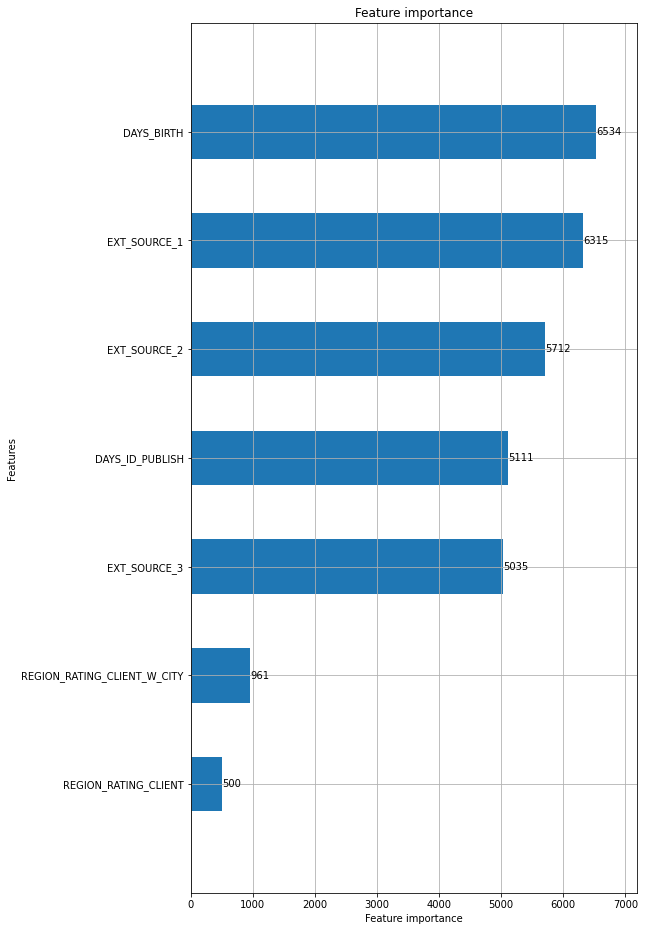

In [310]:
#特徴量の重要度を表示
lgb.plot_importance(model1, height=0.5, figsize=(8,16))

REGION_RATING_CLIENT_W_CITYとREGION_RATING_CLIENTはあまり重要度が高くない

In [311]:
# テストデータを予測する
y_pred = model1.predict(X_test3, num_iteration = model1.best_iteration)

In [313]:
# AUCを計算する
import sklearn.metrics as metrics

fpr, tpr, thresholds = metrics.roc_curve(y_test3, y_pred)
auc = metrics.auc(fpr, tpr)
print(auc)

0.7315244871249443


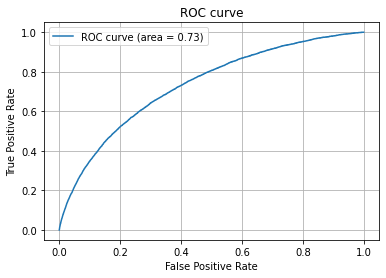

In [314]:
# ROC曲線をプロット
plt.plot(fpr, tpr, label='ROC curve (area = %.2f)'%auc)
plt.legend()
plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid(True)

精度向上

Optunaとは

ハイパーパラメータ自動最適化フレームワーク

LightGBMをOptunaでパラメータチューニング

In [ ]:
# !pip install optuna

In [315]:
import optuna.integration.lightgbm as lgbo

In [316]:
X4 = df[["DAYS_BIRTH","REGION_RATING_CLIENT_W_CITY","REGION_RATING_CLIENT","DAYS_ID_PUBLISH",
                 "EXT_SOURCE_1","EXT_SOURCE_2","EXT_SOURCE_3"]]
y4 = df["TARGET"]


print(X4.shape)
print(y4.shape)


X_train4, X_test4, y_train4, y_test4 = train_test_split(X4, y4, test_size=0.3, random_state=0)

print(X_train4.shape)
print(X_test4.shape)
print(y_train4.shape)
print(y_train4.shape)

(307511, 7)
(307511,)
(215257, 7)
(92254, 7)
(215257,)
(215257,)


In [317]:
#LightGBMにデータセットを登録する
print(y3_train.shape)
print(y3_test.shape)

lgb_train = lgb.Dataset(data=X_train3, label=y_train3)
lgb_eval = lgb.Dataset(data=X_test3, label=y_test3)

(215257,)
(215257,)


In [292]:
params = {'objective': 'binary',
          'metric': 'auc',
          'random_seed':0} 

In [293]:
model = lgbo.train(params,                       # ハイパーパラメータをセット
                  lgb_train,                    # 訓練データを訓練用にセット
                  valid_sets=lgb_eval,          # 訓練データとテストデータをセット
                  early_stopping_rounds=150,    # アーリーストッピング設定
                  verbose_eval=200)             # コンソールから確認できる




  0%|          | 0/7 [00:00<?, ?it/s]


feature_fraction, val_score: -inf:   0%|          | 0/7 [00:00<?, ?it/s]

Training until validation scores don't improve for 150 rounds.
[200]	valid_0's auc: 0.728116
Early stopping, best iteration is:
[104]	valid_0's auc: 0.729979





feature_fraction, val_score: 0.729979:   0%|          | 0/7 [00:06<?, ?it/s]


feature_fraction, val_score: 0.729979:  14%|#4        | 1/7 [00:06<00:37,  6.30s/it][I 2020-08-05 06:47:30,442] Trial 0 finished with value: 0.729979227580731 and parameters: {'feature_fraction': 0.4}. Best is trial 0 with value: 0.729979227580731.



feature_fraction, val_score: 0.729979:  14%|#4        | 1/7 [00:06<00:37,  6.30s/it]

Training until validation scores don't improve for 150 rounds.
[200]	valid_0's auc: 0.729232
Early stopping, best iteration is:
[57]	valid_0's auc: 0.731328





feature_fraction, val_score: 0.731328:  14%|#4        | 1/7 [00:11<00:37,  6.30s/it]


feature_fraction, val_score: 0.731328:  29%|##8       | 2/7 [00:11<00:29,  5.90s/it][I 2020-08-05 06:47:35,436] Trial 1 finished with value: 0.7313280293400234 and parameters: {'feature_fraction': 0.6}. Best is trial 1 with value: 0.7313280293400234.



feature_fraction, val_score: 0.731328:  29%|##8       | 2/7 [00:11<00:29,  5.90s/it]

Training until validation scores don't improve for 150 rounds.
[200]	valid_0's auc: 0.729232
Early stopping, best iteration is:
[57]	valid_0's auc: 0.731328





feature_fraction, val_score: 0.731328:  29%|##8       | 2/7 [00:16<00:29,  5.90s/it]


feature_fraction, val_score: 0.731328:  43%|####2     | 3/7 [00:16<00:22,  5.62s/it][I 2020-08-05 06:47:40,407] Trial 2 finished with value: 0.7313280293400234 and parameters: {'feature_fraction': 0.7}. Best is trial 1 with value: 0.7313280293400234.



feature_fraction, val_score: 0.731328:  43%|####2     | 3/7 [00:16<00:22,  5.62s/it]

Training until validation scores don't improve for 150 rounds.
Early stopping, best iteration is:
[43]	valid_0's auc: 0.730937





feature_fraction, val_score: 0.731328:  43%|####2     | 3/7 [00:21<00:22,  5.62s/it]


feature_fraction, val_score: 0.731328:  57%|#####7    | 4/7 [00:21<00:16,  5.43s/it][I 2020-08-05 06:47:45,372] Trial 3 finished with value: 0.7309370607633214 and parameters: {'feature_fraction': 0.8999999999999999}. Best is trial 1 with value: 0.7313280293400234.



feature_fraction, val_score: 0.731328:  57%|#####7    | 4/7 [00:21<00:16,  5.43s/it]

Training until validation scores don't improve for 150 rounds.
[200]	valid_0's auc: 0.729486
Early stopping, best iteration is:
[81]	valid_0's auc: 0.731394





feature_fraction, val_score: 0.731394:  57%|#####7    | 4/7 [00:26<00:16,  5.43s/it]


feature_fraction, val_score: 0.731394:  71%|#######1  | 5/7 [00:26<00:11,  5.51s/it][I 2020-08-05 06:47:51,065] Trial 4 finished with value: 0.7313942343267774 and parameters: {'feature_fraction': 0.8}. Best is trial 4 with value: 0.7313942343267774.



feature_fraction, val_score: 0.731394:  71%|#######1  | 5/7 [00:26<00:11,  5.51s/it]

Training until validation scores don't improve for 150 rounds.
[200]	valid_0's auc: 0.729346
Early stopping, best iteration is:
[69]	valid_0's auc: 0.730976





feature_fraction, val_score: 0.731394:  71%|#######1  | 5/7 [00:32<00:11,  5.51s/it]


feature_fraction, val_score: 0.731394:  86%|########5 | 6/7 [00:32<00:05,  5.55s/it][I 2020-08-05 06:47:56,727] Trial 5 finished with value: 0.7309757110239249 and parameters: {'feature_fraction': 1.0}. Best is trial 4 with value: 0.7313942343267774.



feature_fraction, val_score: 0.731394:  86%|########5 | 6/7 [00:32<00:05,  5.55s/it]

Training until validation scores don't improve for 150 rounds.
[200]	valid_0's auc: 0.730019
Early stopping, best iteration is:
[99]	valid_0's auc: 0.73083





feature_fraction, val_score: 0.731394:  86%|########5 | 6/7 [00:38<00:05,  5.55s/it]


feature_fraction, val_score: 0.731394: 100%|##########| 7/7 [00:38<00:00,  5.51s/it]



  0%|          | 0/20 [00:00<?, ?it/s]


num_leaves, val_score: 0.731394:   0%|          | 0/20 [00:00<?, ?it/s]

Training until validation scores don't improve for 150 rounds.
Early stopping, best iteration is:
[20]	valid_0's auc: 0.727367





num_leaves, val_score: 0.731394:   0%|          | 0/20 [00:06<?, ?it/s]


num_leaves, val_score: 0.731394:   5%|5         | 1/20 [00:06<01:54,  6.02s/it][I 2020-08-05 06:48:08,769] Trial 7 finished with value: 0.7273668024047925 and parameters: {'num_leaves': 236}. Best is trial 7 with value: 0.7273668024047925.



num_leaves, val_score: 0.731394:   5%|5         | 1/20 [00:06<01:54,  6.02s/it]

Training until validation scores don't improve for 150 rounds.
Early stopping, best iteration is:
[19]	valid_0's auc: 0.728771





num_leaves, val_score: 0.731394:   5%|5         | 1/20 [00:11<01:54,  6.02s/it]


num_leaves, val_score: 0.731394:  10%|#         | 2/20 [00:11<01:44,  5.80s/it][I 2020-08-05 06:48:14,051] Trial 8 finished with value: 0.728770545149736 and parameters: {'num_leaves': 145}. Best is trial 8 with value: 0.728770545149736.



num_leaves, val_score: 0.731394:  10%|#         | 2/20 [00:11<01:44,  5.80s/it]

Training until validation scores don't improve for 150 rounds.
Early stopping, best iteration is:
[18]	valid_0's auc: 0.728304





num_leaves, val_score: 0.731394:  10%|#         | 2/20 [00:16<01:44,  5.80s/it]


num_leaves, val_score: 0.731394:  15%|#5        | 3/20 [00:16<01:37,  5.74s/it][I 2020-08-05 06:48:19,674] Trial 9 finished with value: 0.7283040353249857 and parameters: {'num_leaves': 185}. Best is trial 8 with value: 0.728770545149736.



num_leaves, val_score: 0.731394:  15%|#5        | 3/20 [00:16<01:37,  5.74s/it]

Training until validation scores don't improve for 150 rounds.
[200]	valid_0's auc: 0.731297
Early stopping, best iteration is:
[247]	valid_0's auc: 0.731459





num_leaves, val_score: 0.731459:  15%|#5        | 3/20 [00:25<01:37,  5.74s/it]


num_leaves, val_score: 0.731459:  20%|##        | 4/20 [00:25<01:45,  6.61s/it][I 2020-08-05 06:48:28,291] Trial 10 finished with value: 0.7314591790225455 and parameters: {'num_leaves': 9}. Best is trial 10 with value: 0.7314591790225455.



num_leaves, val_score: 0.731459:  20%|##        | 4/20 [00:25<01:45,  6.61s/it]

Training until validation scores don't improve for 150 rounds.
[200]	valid_0's auc: 0.731408
Early stopping, best iteration is:
[80]	valid_0's auc: 0.732013





num_leaves, val_score: 0.732013:  20%|##        | 4/20 [00:30<01:45,  6.61s/it]


num_leaves, val_score: 0.732013:  25%|##5       | 5/20 [00:30<01:33,  6.25s/it][I 2020-08-05 06:48:33,709] Trial 11 finished with value: 0.7320131711719355 and parameters: {'num_leaves': 19}. Best is trial 11 with value: 0.7320131711719355.



num_leaves, val_score: 0.732013:  25%|##5       | 5/20 [00:30<01:33,  6.25s/it]

Training until validation scores don't improve for 150 rounds.
[200]	valid_0's auc: 0.730309
[400]	valid_0's auc: 0.731817
[600]	valid_0's auc: 0.732185
Early stopping, best iteration is:
[535]	valid_0's auc: 0.732205





num_leaves, val_score: 0.732205:  25%|##5       | 5/20 [00:44<01:33,  6.25s/it]


num_leaves, val_score: 0.732205:  30%|###       | 6/20 [00:44<02:00,  8.57s/it][I 2020-08-05 06:48:47,705] Trial 12 finished with value: 0.7322052801106219 and parameters: {'num_leaves': 4}. Best is trial 12 with value: 0.7322052801106219.



num_leaves, val_score: 0.732205:  30%|###       | 6/20 [00:44<02:00,  8.57s/it]

Training until validation scores don't improve for 150 rounds.
[200]	valid_0's auc: 0.726597
[400]	valid_0's auc: 0.727474
[600]	valid_0's auc: 0.72796
[800]	valid_0's auc: 0.728188
[1000]	valid_0's auc: 0.728352
Did not meet early stopping. Best iteration is:
[999]	valid_0's auc: 0.728353





num_leaves, val_score: 0.732205:  30%|###       | 6/20 [01:03<02:00,  8.57s/it]


num_leaves, val_score: 0.732205:  35%|###5      | 7/20 [01:03<02:30, 11.61s/it][I 2020-08-05 06:49:06,395] Trial 13 finished with value: 0.7283531858712123 and parameters: {'num_leaves': 2}. Best is trial 12 with value: 0.7322052801106219.



num_leaves, val_score: 0.732205:  35%|###5      | 7/20 [01:03<02:30, 11.61s/it]

Training until validation scores don't improve for 150 rounds.
Early stopping, best iteration is:
[46]	valid_0's auc: 0.731035





num_leaves, val_score: 0.732205:  35%|###5      | 7/20 [01:08<02:30, 11.61s/it]


num_leaves, val_score: 0.732205:  40%|####      | 8/20 [01:08<01:56,  9.69s/it][I 2020-08-05 06:49:11,610] Trial 14 finished with value: 0.7310346735491764 and parameters: {'num_leaves': 58}. Best is trial 12 with value: 0.7322052801106219.



num_leaves, val_score: 0.732205:  40%|####      | 8/20 [01:08<01:56,  9.69s/it]

Training until validation scores don't improve for 150 rounds.
Early stopping, best iteration is:
[46]	valid_0's auc: 0.731035





num_leaves, val_score: 0.732205:  40%|####      | 8/20 [01:14<01:56,  9.69s/it]


num_leaves, val_score: 0.732205:  45%|####5     | 9/20 [01:14<01:31,  8.35s/it][I 2020-08-05 06:49:16,816] Trial 15 finished with value: 0.7310346735491764 and parameters: {'num_leaves': 58}. Best is trial 12 with value: 0.7322052801106219.



num_leaves, val_score: 0.732205:  45%|####5     | 9/20 [01:14<01:31,  8.35s/it]

Training until validation scores don't improve for 150 rounds.
Early stopping, best iteration is:
[47]	valid_0's auc: 0.730602





num_leaves, val_score: 0.732205:  45%|####5     | 9/20 [01:19<01:31,  8.35s/it]


num_leaves, val_score: 0.732205:  50%|#####     | 10/20 [01:19<01:14,  7.43s/it][I 2020-08-05 06:49:22,111] Trial 16 finished with value: 0.730601676554429 and parameters: {'num_leaves': 60}. Best is trial 12 with value: 0.7322052801106219.



num_leaves, val_score: 0.732205:  50%|#####     | 10/20 [01:19<01:14,  7.43s/it]

Training until validation scores don't improve for 150 rounds.
[200]	valid_0's auc: 0.731184
Early stopping, best iteration is:
[131]	valid_0's auc: 0.731323





num_leaves, val_score: 0.732205:  50%|#####     | 10/20 [01:25<01:14,  7.43s/it]


num_leaves, val_score: 0.732205:  55%|#####5    | 11/20 [01:25<01:04,  7.11s/it][I 2020-08-05 06:49:28,481] Trial 17 finished with value: 0.7313225758338987 and parameters: {'num_leaves': 12}. Best is trial 12 with value: 0.7322052801106219.



num_leaves, val_score: 0.732205:  55%|#####5    | 11/20 [01:25<01:04,  7.11s/it]

Training until validation scores don't improve for 150 rounds.
Early stopping, best iteration is:
[46]	valid_0's auc: 0.729721





num_leaves, val_score: 0.732205:  55%|#####5    | 11/20 [01:31<01:04,  7.11s/it]


num_leaves, val_score: 0.732205:  60%|######    | 12/20 [01:31<00:53,  6.68s/it][I 2020-08-05 06:49:34,144] Trial 18 finished with value: 0.7297209168641791 and parameters: {'num_leaves': 96}. Best is trial 12 with value: 0.7322052801106219.



num_leaves, val_score: 0.732205:  60%|######    | 12/20 [01:31<00:53,  6.68s/it]

Training until validation scores don't improve for 150 rounds.
[200]	valid_0's auc: 0.73103
[400]	valid_0's auc: 0.731917
[600]	valid_0's auc: 0.731862
Early stopping, best iteration is:
[539]	valid_0's auc: 0.732082





num_leaves, val_score: 0.732205:  60%|######    | 12/20 [01:45<00:53,  6.68s/it]


num_leaves, val_score: 0.732205:  65%|######5   | 13/20 [01:45<01:02,  8.99s/it][I 2020-08-05 06:49:48,539] Trial 19 finished with value: 0.7320821470339698 and parameters: {'num_leaves': 5}. Best is trial 12 with value: 0.7322052801106219.



num_leaves, val_score: 0.732205:  65%|######5   | 13/20 [01:45<01:02,  8.99s/it]

Training until validation scores don't improve for 150 rounds.
Early stopping, best iteration is:
[21]	valid_0's auc: 0.729377





num_leaves, val_score: 0.732205:  65%|######5   | 13/20 [01:50<01:02,  8.99s/it]


num_leaves, val_score: 0.732205:  70%|#######   | 14/20 [01:50<00:46,  7.83s/it][I 2020-08-05 06:49:53,650] Trial 20 finished with value: 0.7293773644294317 and parameters: {'num_leaves': 107}. Best is trial 12 with value: 0.7322052801106219.



num_leaves, val_score: 0.732205:  70%|#######   | 14/20 [01:50<00:46,  7.83s/it]

Training until validation scores don't improve for 150 rounds.
[200]	valid_0's auc: 0.726597
[400]	valid_0's auc: 0.727474
[600]	valid_0's auc: 0.72796
[800]	valid_0's auc: 0.728188
[1000]	valid_0's auc: 0.728352
Did not meet early stopping. Best iteration is:
[999]	valid_0's auc: 0.728353





num_leaves, val_score: 0.732205:  70%|#######   | 14/20 [02:09<00:46,  7.83s/it]


num_leaves, val_score: 0.732205:  75%|#######5  | 15/20 [02:09<00:55, 11.13s/it][I 2020-08-05 06:50:12,485] Trial 21 finished with value: 0.7283531858712123 and parameters: {'num_leaves': 2}. Best is trial 12 with value: 0.7322052801106219.



num_leaves, val_score: 0.732205:  75%|#######5  | 15/20 [02:09<00:55, 11.13s/it]

Training until validation scores don't improve for 150 rounds.
Early stopping, best iteration is:
[47]	valid_0's auc: 0.731241





num_leaves, val_score: 0.732205:  75%|#######5  | 15/20 [02:14<00:55, 11.13s/it]


num_leaves, val_score: 0.732205:  80%|########  | 16/20 [02:14<00:37,  9.31s/it][I 2020-08-05 06:50:17,550] Trial 22 finished with value: 0.7312409713908973 and parameters: {'num_leaves': 37}. Best is trial 12 with value: 0.7322052801106219.



num_leaves, val_score: 0.732205:  80%|########  | 16/20 [02:14<00:37,  9.31s/it]

Training until validation scores don't improve for 150 rounds.
[200]	valid_0's auc: 0.730524
Early stopping, best iteration is:
[52]	valid_0's auc: 0.731507





num_leaves, val_score: 0.732205:  80%|########  | 16/20 [02:19<00:37,  9.31s/it]


num_leaves, val_score: 0.732205:  85%|########5 | 17/20 [02:19<00:24,  8.04s/it][I 2020-08-05 06:50:22,635] Trial 23 finished with value: 0.7315071230266699 and parameters: {'num_leaves': 29}. Best is trial 12 with value: 0.7322052801106219.



num_leaves, val_score: 0.732205:  85%|########5 | 17/20 [02:19<00:24,  8.04s/it]

Training until validation scores don't improve for 150 rounds.
Early stopping, best iteration is:
[48]	valid_0's auc: 0.731139





num_leaves, val_score: 0.732205:  85%|########5 | 17/20 [02:24<00:24,  8.04s/it]


num_leaves, val_score: 0.732205:  90%|######### | 18/20 [02:24<00:14,  7.13s/it][I 2020-08-05 06:50:27,649] Trial 24 finished with value: 0.7311388966454857 and parameters: {'num_leaves': 33}. Best is trial 12 with value: 0.7322052801106219.



num_leaves, val_score: 0.732205:  90%|######### | 18/20 [02:24<00:14,  7.13s/it]

Training until validation scores don't improve for 150 rounds.
[200]	valid_0's auc: 0.73103
[400]	valid_0's auc: 0.731917
[600]	valid_0's auc: 0.731862
Early stopping, best iteration is:
[539]	valid_0's auc: 0.732082





num_leaves, val_score: 0.732205:  90%|######### | 18/20 [02:39<00:14,  7.13s/it]


num_leaves, val_score: 0.732205:  95%|#########5| 19/20 [02:39<00:09,  9.25s/it][I 2020-08-05 06:50:41,851] Trial 25 finished with value: 0.7320821470339698 and parameters: {'num_leaves': 5}. Best is trial 12 with value: 0.7322052801106219.



num_leaves, val_score: 0.732205:  95%|#########5| 19/20 [02:39<00:09,  9.25s/it]

Training until validation scores don't improve for 150 rounds.
Early stopping, best iteration is:
[42]	valid_0's auc: 0.729679





num_leaves, val_score: 0.732205:  95%|#########5| 19/20 [02:44<00:09,  9.25s/it]


num_leaves, val_score: 0.732205: 100%|##########| 20/20 [02:44<00:00,  8.23s/it]



  0%|          | 0/10 [00:00<?, ?it/s]


bagging, val_score: 0.732205:   0%|          | 0/10 [00:00<?, ?it/s]

Training until validation scores don't improve for 150 rounds.
[200]	valid_0's auc: 0.730209
[400]	valid_0's auc: 0.731202
[600]	valid_0's auc: 0.731162
Early stopping, best iteration is:
[516]	valid_0's auc: 0.731393





bagging, val_score: 0.732205:   0%|          | 0/10 [00:14<?, ?it/s]


bagging, val_score: 0.732205:  10%|#         | 1/10 [00:14<02:09, 14.41s/it][I 2020-08-05 06:51:01,733] Trial 27 finished with value: 0.7313933743446407 and parameters: {'bagging_fraction': 0.4655676734146482, 'bagging_freq': 6}. Best is trial 27 with value: 0.7313933743446407.



bagging, val_score: 0.732205:  10%|#         | 1/10 [00:14<02:09, 14.41s/it]

Training until validation scores don't improve for 150 rounds.
[200]	valid_0's auc: 0.73053
[400]	valid_0's auc: 0.732025
[600]	valid_0's auc: 0.732189
[800]	valid_0's auc: 0.73212
Early stopping, best iteration is:
[707]	valid_0's auc: 0.732336





bagging, val_score: 0.732336:  10%|#         | 1/10 [00:39<02:09, 14.41s/it]


bagging, val_score: 0.732336:  20%|##        | 2/10 [00:39<02:21, 17.69s/it][I 2020-08-05 06:51:27,099] Trial 28 finished with value: 0.732335556975453 and parameters: {'bagging_fraction': 0.9867722845513585, 'bagging_freq': 1}. Best is trial 28 with value: 0.732335556975453.



bagging, val_score: 0.732336:  20%|##        | 2/10 [00:39<02:21, 17.69s/it]

Training until validation scores don't improve for 150 rounds.
[200]	valid_0's auc: 0.731083
[400]	valid_0's auc: 0.732283
[600]	valid_0's auc: 0.732471
Early stopping, best iteration is:
[637]	valid_0's auc: 0.732504





bagging, val_score: 0.732504:  20%|##        | 2/10 [00:57<02:21, 17.69s/it]


bagging, val_score: 0.732504:  30%|###       | 3/10 [00:57<02:03, 17.60s/it][I 2020-08-05 06:51:44,484] Trial 29 finished with value: 0.7325043557453449 and parameters: {'bagging_fraction': 0.9784660429644758, 'bagging_freq': 1}. Best is trial 29 with value: 0.7325043557453449.



bagging, val_score: 0.732504:  30%|###       | 3/10 [00:57<02:03, 17.60s/it]

Training until validation scores don't improve for 150 rounds.
[200]	valid_0's auc: 0.730238
[400]	valid_0's auc: 0.731739
[600]	valid_0's auc: 0.732209
Early stopping, best iteration is:
[601]	valid_0's auc: 0.732249





bagging, val_score: 0.732504:  30%|###       | 3/10 [01:13<02:03, 17.60s/it]


bagging, val_score: 0.732504:  40%|####      | 4/10 [01:13<01:43, 17.29s/it][I 2020-08-05 06:52:01,057] Trial 30 finished with value: 0.7322494288017901 and parameters: {'bagging_fraction': 0.9996772939522809, 'bagging_freq': 1}. Best is trial 29 with value: 0.7325043557453449.



bagging, val_score: 0.732504:  40%|####      | 4/10 [01:13<01:43, 17.29s/it]

Training until validation scores don't improve for 150 rounds.
[200]	valid_0's auc: 0.730473
[400]	valid_0's auc: 0.731887
[600]	valid_0's auc: 0.732125
Early stopping, best iteration is:
[627]	valid_0's auc: 0.732174





bagging, val_score: 0.732504:  40%|####      | 4/10 [01:30<01:43, 17.29s/it]


bagging, val_score: 0.732504:  50%|#####     | 5/10 [01:30<01:25, 17.20s/it][I 2020-08-05 06:52:18,037] Trial 31 finished with value: 0.7321738843448531 and parameters: {'bagging_fraction': 0.9937012332648082, 'bagging_freq': 1}. Best is trial 29 with value: 0.7325043557453449.



bagging, val_score: 0.732504:  50%|#####     | 5/10 [01:30<01:25, 17.20s/it]

Training until validation scores don't improve for 150 rounds.
[200]	valid_0's auc: 0.730684
[400]	valid_0's auc: 0.731827
[600]	valid_0's auc: 0.73199
Early stopping, best iteration is:
[629]	valid_0's auc: 0.73207





bagging, val_score: 0.732504:  50%|#####     | 5/10 [01:47<01:25, 17.20s/it]


bagging, val_score: 0.732504:  60%|######    | 6/10 [01:47<01:08, 17.13s/it][I 2020-08-05 06:52:35,000] Trial 32 finished with value: 0.7320699171574073 and parameters: {'bagging_fraction': 0.998033823217017, 'bagging_freq': 1}. Best is trial 29 with value: 0.7325043557453449.



bagging, val_score: 0.732504:  60%|######    | 6/10 [01:47<01:08, 17.13s/it]

Training until validation scores don't improve for 150 rounds.
[200]	valid_0's auc: 0.730348
[400]	valid_0's auc: 0.731901
[600]	valid_0's auc: 0.732141
[800]	valid_0's auc: 0.732135
Early stopping, best iteration is:
[657]	valid_0's auc: 0.732291





bagging, val_score: 0.732504:  60%|######    | 6/10 [02:05<01:08, 17.13s/it]


bagging, val_score: 0.732504:  70%|#######   | 7/10 [02:05<00:52, 17.34s/it][I 2020-08-05 06:52:52,820] Trial 33 finished with value: 0.7322906830754681 and parameters: {'bagging_fraction': 0.995246745505673, 'bagging_freq': 1}. Best is trial 29 with value: 0.7325043557453449.



bagging, val_score: 0.732504:  70%|#######   | 7/10 [02:05<00:52, 17.34s/it]

Training until validation scores don't improve for 150 rounds.
[200]	valid_0's auc: 0.730602
[400]	valid_0's auc: 0.731974
[600]	valid_0's auc: 0.731968
Early stopping, best iteration is:
[577]	valid_0's auc: 0.732112





bagging, val_score: 0.732504:  70%|#######   | 7/10 [02:21<00:52, 17.34s/it]


bagging, val_score: 0.732504:  80%|########  | 8/10 [02:21<00:33, 16.95s/it][I 2020-08-05 06:53:08,874] Trial 34 finished with value: 0.7321117273710301 and parameters: {'bagging_fraction': 0.9697503084386558, 'bagging_freq': 1}. Best is trial 29 with value: 0.7325043557453449.



bagging, val_score: 0.732504:  80%|########  | 8/10 [02:21<00:33, 16.95s/it]

Training until validation scores don't improve for 150 rounds.
[200]	valid_0's auc: 0.730709
[400]	valid_0's auc: 0.732136
[600]	valid_0's auc: 0.732245
Early stopping, best iteration is:
[631]	valid_0's auc: 0.732332





bagging, val_score: 0.732504:  80%|########  | 8/10 [02:38<00:33, 16.95s/it]


bagging, val_score: 0.732504:  90%|######### | 9/10 [02:38<00:17, 17.02s/it][I 2020-08-05 06:53:26,059] Trial 35 finished with value: 0.732332302360221 and parameters: {'bagging_fraction': 0.996376512666657, 'bagging_freq': 1}. Best is trial 29 with value: 0.7325043557453449.



bagging, val_score: 0.732504:  90%|######### | 9/10 [02:38<00:17, 17.02s/it]

Training until validation scores don't improve for 150 rounds.
[200]	valid_0's auc: 0.730953
[400]	valid_0's auc: 0.732401
Early stopping, best iteration is:
[371]	valid_0's auc: 0.73251





bagging, val_score: 0.732510:  90%|######### | 9/10 [02:50<00:17, 17.02s/it]


bagging, val_score: 0.732510: 100%|##########| 10/10 [02:50<00:00, 17.07s/it]



  0%|          | 0/6 [00:00<?, ?it/s]


feature_fraction_stage2, val_score: 0.732510:   0%|          | 0/6 [00:00<?, ?it/s]

Training until validation scores don't improve for 150 rounds.
[200]	valid_0's auc: 0.730843
[400]	valid_0's auc: 0.732081
Early stopping, best iteration is:
[371]	valid_0's auc: 0.732156





feature_fraction_stage2, val_score: 0.732510:   0%|          | 0/6 [00:12<?, ?it/s]


feature_fraction_stage2, val_score: 0.732510:  17%|#6        | 1/6 [00:12<01:01, 12.23s/it][I 2020-08-05 06:53:50,307] Trial 37 finished with value: 0.7321556538466648 and parameters: {'feature_fraction': 0.88}. Best is trial 37 with value: 0.7321556538466648.



feature_fraction_stage2, val_score: 0.732510:  17%|#6        | 1/6 [00:12<01:01, 12.23s/it]

Training until validation scores don't improve for 150 rounds.
[200]	valid_0's auc: 0.730953
[400]	valid_0's auc: 0.732401
Early stopping, best iteration is:
[371]	valid_0's auc: 0.73251





feature_fraction_stage2, val_score: 0.732510:  17%|#6        | 1/6 [00:24<01:01, 12.23s/it]


feature_fraction_stage2, val_score: 0.732510:  33%|###3      | 2/6 [00:24<00:48, 12.16s/it][I 2020-08-05 06:54:02,307] Trial 38 finished with value: 0.7325099817292302 and parameters: {'feature_fraction': 0.7200000000000001}. Best is trial 38 with value: 0.7325099817292302.



feature_fraction_stage2, val_score: 0.732510:  33%|###3      | 2/6 [00:24<00:48, 12.16s/it]

Training until validation scores don't improve for 150 rounds.
[200]	valid_0's auc: 0.730953
[400]	valid_0's auc: 0.732401
Early stopping, best iteration is:
[371]	valid_0's auc: 0.73251





feature_fraction_stage2, val_score: 0.732510:  33%|###3      | 2/6 [00:36<00:48, 12.16s/it]


feature_fraction_stage2, val_score: 0.732510:  50%|#####     | 3/6 [00:36<00:36, 12.13s/it][I 2020-08-05 06:54:14,367] Trial 39 finished with value: 0.7325099817292302 and parameters: {'feature_fraction': 0.7520000000000001}. Best is trial 38 with value: 0.7325099817292302.



feature_fraction_stage2, val_score: 0.732510:  50%|#####     | 3/6 [00:36<00:36, 12.13s/it]

Training until validation scores don't improve for 150 rounds.
[200]	valid_0's auc: 0.730953
[400]	valid_0's auc: 0.732401
Early stopping, best iteration is:
[371]	valid_0's auc: 0.73251





feature_fraction_stage2, val_score: 0.732510:  50%|#####     | 3/6 [00:48<00:36, 12.13s/it]


feature_fraction_stage2, val_score: 0.732510:  67%|######6   | 4/6 [00:48<00:24, 12.13s/it][I 2020-08-05 06:54:26,505] Trial 40 finished with value: 0.7325099817292302 and parameters: {'feature_fraction': 0.8480000000000001}. Best is trial 38 with value: 0.7325099817292302.



feature_fraction_stage2, val_score: 0.732510:  67%|######6   | 4/6 [00:48<00:24, 12.13s/it]

Training until validation scores don't improve for 150 rounds.
[200]	valid_0's auc: 0.730953
[400]	valid_0's auc: 0.732401
Early stopping, best iteration is:
[371]	valid_0's auc: 0.73251





feature_fraction_stage2, val_score: 0.732510:  67%|######6   | 4/6 [01:00<00:24, 12.13s/it]


feature_fraction_stage2, val_score: 0.732510:  83%|########3 | 5/6 [01:00<00:12, 12.17s/it][I 2020-08-05 06:54:38,756] Trial 41 finished with value: 0.7325099817292302 and parameters: {'feature_fraction': 0.784}. Best is trial 38 with value: 0.7325099817292302.



feature_fraction_stage2, val_score: 0.732510:  83%|########3 | 5/6 [01:00<00:12, 12.17s/it]

Training until validation scores don't improve for 150 rounds.
[200]	valid_0's auc: 0.730953
[400]	valid_0's auc: 0.732401
Early stopping, best iteration is:
[371]	valid_0's auc: 0.73251





feature_fraction_stage2, val_score: 0.732510:  83%|########3 | 5/6 [01:12<00:12, 12.17s/it]


feature_fraction_stage2, val_score: 0.732510: 100%|##########| 6/6 [01:12<00:00, 12.13s/it]



  0%|          | 0/20 [00:00<?, ?it/s]


regularization_factors, val_score: 0.732510:   0%|          | 0/20 [00:00<?, ?it/s]

Training until validation scores don't improve for 150 rounds.
[200]	valid_0's auc: 0.731171
[400]	valid_0's auc: 0.732463
Early stopping, best iteration is:
[374]	valid_0's auc: 0.732536





regularization_factors, val_score: 0.732536:   0%|          | 0/20 [00:12<?, ?it/s]


regularization_factors, val_score: 0.732536:   5%|5         | 1/20 [00:12<03:51, 12.19s/it][I 2020-08-05 06:55:03,066] Trial 43 finished with value: 0.7325363732332743 and parameters: {'lambda_l1': 0.8513937096908145, 'lambda_l2': 3.9149547711948643e-08}. Best is trial 43 with value: 0.7325363732332743.



regularization_factors, val_score: 0.732536:   5%|5         | 1/20 [00:12<03:51, 12.19s/it]

Training until validation scores don't improve for 150 rounds.
[200]	valid_0's auc: 0.730767
[400]	valid_0's auc: 0.732406
[600]	valid_0's auc: 0.732585
[800]	valid_0's auc: 0.732776
Early stopping, best iteration is:
[783]	valid_0's auc: 0.732866





regularization_factors, val_score: 0.732866:   5%|5         | 1/20 [00:34<03:51, 12.19s/it]


regularization_factors, val_score: 0.732866:  10%|#         | 2/20 [00:34<04:32, 15.14s/it][I 2020-08-05 06:55:25,084] Trial 44 finished with value: 0.7328664611715819 and parameters: {'lambda_l1': 6.036723179740786, 'lambda_l2': 4.8460528143515374e-08}. Best is trial 44 with value: 0.7328664611715819.



regularization_factors, val_score: 0.732866:  10%|#         | 2/20 [00:34<04:32, 15.14s/it]

Training until validation scores don't improve for 150 rounds.
[200]	valid_0's auc: 0.731282
[400]	valid_0's auc: 0.732892
[600]	valid_0's auc: 0.733107
[800]	valid_0's auc: 0.733149
Early stopping, best iteration is:
[705]	valid_0's auc: 0.733312





regularization_factors, val_score: 0.733312:  10%|#         | 2/20 [00:54<04:32, 15.14s/it]


regularization_factors, val_score: 0.733312:  15%|#5        | 3/20 [00:54<04:44, 16.73s/it][I 2020-08-05 06:55:45,550] Trial 45 finished with value: 0.7333121894317308 and parameters: {'lambda_l1': 8.704022927006767, 'lambda_l2': 1.6392166425930377e-08}. Best is trial 45 with value: 0.7333121894317308.



regularization_factors, val_score: 0.733312:  15%|#5        | 3/20 [00:54<04:44, 16.73s/it]

Training until validation scores don't improve for 150 rounds.
[200]	valid_0's auc: 0.73092
[400]	valid_0's auc: 0.732668
[600]	valid_0's auc: 0.732943
Early stopping, best iteration is:
[491]	valid_0's auc: 0.733031





regularization_factors, val_score: 0.733312:  15%|#5        | 3/20 [01:10<04:44, 16.73s/it]


regularization_factors, val_score: 0.733312:  20%|##        | 4/20 [01:10<04:22, 16.38s/it][I 2020-08-05 06:56:01,093] Trial 46 finished with value: 0.7330311653996584 and parameters: {'lambda_l1': 9.04484571243081, 'lambda_l2': 1.630472355054122e-08}. Best is trial 45 with value: 0.7333121894317308.



regularization_factors, val_score: 0.733312:  20%|##        | 4/20 [01:10<04:22, 16.38s/it]

Training until validation scores don't improve for 150 rounds.
[200]	valid_0's auc: 0.730915
[400]	valid_0's auc: 0.732436
[600]	valid_0's auc: 0.732543
[800]	valid_0's auc: 0.732486
Early stopping, best iteration is:
[706]	valid_0's auc: 0.732764





regularization_factors, val_score: 0.733312:  20%|##        | 4/20 [01:30<04:22, 16.38s/it]


regularization_factors, val_score: 0.733312:  25%|##5       | 5/20 [01:30<04:24, 17.60s/it][I 2020-08-05 06:56:21,563] Trial 47 finished with value: 0.7327644658461624 and parameters: {'lambda_l1': 6.287365241224709, 'lambda_l2': 1.7422095296098898e-08}. Best is trial 45 with value: 0.7333121894317308.



regularization_factors, val_score: 0.733312:  25%|##5       | 5/20 [01:30<04:24, 17.60s/it]

Training until validation scores don't improve for 150 rounds.
[200]	valid_0's auc: 0.730768
[400]	valid_0's auc: 0.732766
[600]	valid_0's auc: 0.733151
[800]	valid_0's auc: 0.733171
Early stopping, best iteration is:
[700]	valid_0's auc: 0.733367





regularization_factors, val_score: 0.733367:  25%|##5       | 5/20 [01:51<04:24, 17.60s/it]


regularization_factors, val_score: 0.733367:  30%|###       | 6/20 [01:51<04:18, 18.44s/it][I 2020-08-05 06:56:41,959] Trial 48 finished with value: 0.7333674079862433 and parameters: {'lambda_l1': 9.177596209554949, 'lambda_l2': 1.7933014216572835e-08}. Best is trial 48 with value: 0.7333674079862433.



regularization_factors, val_score: 0.733367:  30%|###       | 6/20 [01:51<04:18, 18.44s/it]

Training until validation scores don't improve for 150 rounds.
[200]	valid_0's auc: 0.731083
[400]	valid_0's auc: 0.732713
[600]	valid_0's auc: 0.732985
[800]	valid_0's auc: 0.732925
Early stopping, best iteration is:
[702]	valid_0's auc: 0.733137





regularization_factors, val_score: 0.733367:  30%|###       | 6/20 [02:11<04:18, 18.44s/it]


regularization_factors, val_score: 0.733367:  35%|###5      | 7/20 [02:11<04:07, 19.07s/it][I 2020-08-05 06:57:02,498] Trial 49 finished with value: 0.7331366993269485 and parameters: {'lambda_l1': 9.8371988452662, 'lambda_l2': 1.4706450088142891e-08}. Best is trial 48 with value: 0.7333674079862433.



regularization_factors, val_score: 0.733367:  35%|###5      | 7/20 [02:11<04:07, 19.07s/it]

Training until validation scores don't improve for 150 rounds.
[200]	valid_0's auc: 0.731094
[400]	valid_0's auc: 0.732648
[600]	valid_0's auc: 0.73283
[800]	valid_0's auc: 0.732766
Early stopping, best iteration is:
[703]	valid_0's auc: 0.733





regularization_factors, val_score: 0.733367:  35%|###5      | 7/20 [02:31<04:07, 19.07s/it]


regularization_factors, val_score: 0.733367:  40%|####      | 8/20 [02:31<03:52, 19.41s/it][I 2020-08-05 06:57:22,690] Trial 50 finished with value: 0.73300025658273 and parameters: {'lambda_l1': 7.164453891388604, 'lambda_l2': 1.1228678685517347e-08}. Best is trial 48 with value: 0.7333674079862433.



regularization_factors, val_score: 0.733367:  40%|####      | 8/20 [02:31<03:52, 19.41s/it]

Training until validation scores don't improve for 150 rounds.
[200]	valid_0's auc: 0.730731
[400]	valid_0's auc: 0.732572
[600]	valid_0's auc: 0.732842
[800]	valid_0's auc: 0.732871
Early stopping, best iteration is:
[703]	valid_0's auc: 0.73305





regularization_factors, val_score: 0.733367:  40%|####      | 8/20 [02:52<03:52, 19.41s/it]


regularization_factors, val_score: 0.733367:  45%|####5     | 9/20 [02:52<03:36, 19.67s/it][I 2020-08-05 06:57:42,960] Trial 51 finished with value: 0.7330499614644571 and parameters: {'lambda_l1': 7.3879517163808615, 'lambda_l2': 1.4313935868857761e-08}. Best is trial 48 with value: 0.7333674079862433.



regularization_factors, val_score: 0.733367:  45%|####5     | 9/20 [02:52<03:36, 19.67s/it]

Training until validation scores don't improve for 150 rounds.
[200]	valid_0's auc: 0.731027
[400]	valid_0's auc: 0.732751
[600]	valid_0's auc: 0.733011
[800]	valid_0's auc: 0.733019
Early stopping, best iteration is:
[716]	valid_0's auc: 0.733215





regularization_factors, val_score: 0.733367:  45%|####5     | 9/20 [03:12<03:36, 19.67s/it]


regularization_factors, val_score: 0.733367:  50%|#####     | 10/20 [03:12<03:19, 19.96s/it][I 2020-08-05 06:58:03,610] Trial 52 finished with value: 0.7332153130858027 and parameters: {'lambda_l1': 8.57174915756555, 'lambda_l2': 1.1144330039568406e-08}. Best is trial 48 with value: 0.7333674079862433.



regularization_factors, val_score: 0.733367:  50%|#####     | 10/20 [03:12<03:19, 19.96s/it]

Training until validation scores don't improve for 150 rounds.
[200]	valid_0's auc: 0.730825
[400]	valid_0's auc: 0.732673
[600]	valid_0's auc: 0.732936
[800]	valid_0's auc: 0.732937
Early stopping, best iteration is:
[705]	valid_0's auc: 0.7331





regularization_factors, val_score: 0.733367:  50%|#####     | 10/20 [03:33<03:19, 19.96s/it]


regularization_factors, val_score: 0.733367:  55%|#####5    | 11/20 [03:33<03:01, 20.20s/it][I 2020-08-05 06:58:24,379] Trial 53 finished with value: 0.7330997955039492 and parameters: {'lambda_l1': 9.809650217092326, 'lambda_l2': 1.4056037926553137e-08}. Best is trial 48 with value: 0.7333674079862433.



regularization_factors, val_score: 0.733367:  55%|#####5    | 11/20 [03:33<03:01, 20.20s/it]

Training until validation scores don't improve for 150 rounds.
[200]	valid_0's auc: 0.730935
[400]	valid_0's auc: 0.732741
[600]	valid_0's auc: 0.732992
[800]	valid_0's auc: 0.733138
Early stopping, best iteration is:
[706]	valid_0's auc: 0.733245





regularization_factors, val_score: 0.733367:  55%|#####5    | 11/20 [03:53<03:01, 20.20s/it]


regularization_factors, val_score: 0.733367:  60%|######    | 12/20 [03:53<02:42, 20.26s/it][I 2020-08-05 06:58:44,779] Trial 54 finished with value: 0.7332448204206481 and parameters: {'lambda_l1': 8.790387596575032, 'lambda_l2': 1.055330890384974e-08}. Best is trial 48 with value: 0.7333674079862433.



regularization_factors, val_score: 0.733367:  60%|######    | 12/20 [03:53<02:42, 20.26s/it]

Training until validation scores don't improve for 150 rounds.
[200]	valid_0's auc: 0.730953
[400]	valid_0's auc: 0.732401
Early stopping, best iteration is:
[371]	valid_0's auc: 0.73251





regularization_factors, val_score: 0.733367:  60%|######    | 12/20 [04:05<02:42, 20.26s/it]


regularization_factors, val_score: 0.733367:  65%|######5   | 13/20 [04:05<02:04, 17.80s/it][I 2020-08-05 06:58:56,822] Trial 55 finished with value: 0.7325099817292302 and parameters: {'lambda_l1': 1.9218021402086845e-08, 'lambda_l2': 1.0376342680951668e-08}. Best is trial 48 with value: 0.7333674079862433.



regularization_factors, val_score: 0.733367:  65%|######5   | 13/20 [04:05<02:04, 17.80s/it]

Training until validation scores don't improve for 150 rounds.
[200]	valid_0's auc: 0.730923
[400]	valid_0's auc: 0.732286
Early stopping, best iteration is:
[370]	valid_0's auc: 0.732387





regularization_factors, val_score: 0.733367:  65%|######5   | 13/20 [04:18<02:04, 17.80s/it]


regularization_factors, val_score: 0.733367:  70%|#######   | 14/20 [04:18<01:36, 16.10s/it][I 2020-08-05 06:59:08,948] Trial 56 finished with value: 0.7323868919725738 and parameters: {'lambda_l1': 0.08485032012806412, 'lambda_l2': 1.792830505814062e-05}. Best is trial 48 with value: 0.7333674079862433.



regularization_factors, val_score: 0.733367:  70%|#######   | 14/20 [04:18<01:36, 16.10s/it]

Training until validation scores don't improve for 150 rounds.
[200]	valid_0's auc: 0.730929
[400]	valid_0's auc: 0.732596
[600]	valid_0's auc: 0.732846
[800]	valid_0's auc: 0.732956
Early stopping, best iteration is:
[783]	valid_0's auc: 0.733077





regularization_factors, val_score: 0.733367:  70%|#######   | 14/20 [04:40<01:36, 16.10s/it]


regularization_factors, val_score: 0.733367:  75%|#######5  | 15/20 [04:40<01:30, 18.02s/it][I 2020-08-05 06:59:31,453] Trial 57 finished with value: 0.7330765751840346 and parameters: {'lambda_l1': 8.185805246015297, 'lambda_l2': 8.467226812331294e-07}. Best is trial 48 with value: 0.7333674079862433.



regularization_factors, val_score: 0.733367:  75%|#######5  | 15/20 [04:40<01:30, 18.02s/it]

Training until validation scores don't improve for 150 rounds.
[200]	valid_0's auc: 0.730891
[400]	valid_0's auc: 0.732278
Early stopping, best iteration is:
[370]	valid_0's auc: 0.732347





regularization_factors, val_score: 0.733367:  75%|#######5  | 15/20 [04:52<01:30, 18.02s/it]


regularization_factors, val_score: 0.733367:  80%|########  | 16/20 [04:52<01:04, 16.19s/it][I 2020-08-05 06:59:43,379] Trial 58 finished with value: 0.7323467937010031 and parameters: {'lambda_l1': 0.13408669969605216, 'lambda_l2': 0.0064717407089082985}. Best is trial 48 with value: 0.7333674079862433.



regularization_factors, val_score: 0.733367:  80%|########  | 16/20 [04:52<01:04, 16.19s/it]

Training until validation scores don't improve for 150 rounds.
[200]	valid_0's auc: 0.730856
[400]	valid_0's auc: 0.732939
[600]	valid_0's auc: 0.733087
[800]	valid_0's auc: 0.733086
Early stopping, best iteration is:
[716]	valid_0's auc: 0.733193





regularization_factors, val_score: 0.733367:  80%|########  | 16/20 [05:13<01:04, 16.19s/it]


regularization_factors, val_score: 0.733367:  85%|########5 | 17/20 [05:13<00:52, 17.59s/it][I 2020-08-05 07:00:04,222] Trial 59 finished with value: 0.7331934517301975 and parameters: {'lambda_l1': 8.022519987692336, 'lambda_l2': 4.469599464928057}. Best is trial 48 with value: 0.7333674079862433.



regularization_factors, val_score: 0.733367:  85%|########5 | 17/20 [05:13<00:52, 17.59s/it]

Training until validation scores don't improve for 150 rounds.
[200]	valid_0's auc: 0.730786
[400]	valid_0's auc: 0.732259
Early stopping, best iteration is:
[416]	valid_0's auc: 0.732331





regularization_factors, val_score: 0.733367:  85%|########5 | 17/20 [05:26<00:52, 17.59s/it]


regularization_factors, val_score: 0.733367:  90%|######### | 18/20 [05:26<00:32, 16.36s/it][I 2020-08-05 07:00:17,707] Trial 60 finished with value: 0.7323307011248246 and parameters: {'lambda_l1': 0.41452438731863106, 'lambda_l2': 5.070784525132216}. Best is trial 48 with value: 0.7333674079862433.



regularization_factors, val_score: 0.733367:  90%|######### | 18/20 [05:26<00:32, 16.36s/it]

Training until validation scores don't improve for 150 rounds.
[200]	valid_0's auc: 0.731089
[400]	valid_0's auc: 0.732699
[600]	valid_0's auc: 0.733002
[800]	valid_0's auc: 0.732951
Early stopping, best iteration is:
[690]	valid_0's auc: 0.733191





regularization_factors, val_score: 0.733367:  90%|######### | 18/20 [05:46<00:32, 16.36s/it]


regularization_factors, val_score: 0.733367:  95%|#########5| 19/20 [05:46<00:17, 17.47s/it][I 2020-08-05 07:00:37,776] Trial 61 finished with value: 0.7331905324438208 and parameters: {'lambda_l1': 8.476401032168514, 'lambda_l2': 3.176064033366733e-07}. Best is trial 48 with value: 0.7333674079862433.



regularization_factors, val_score: 0.733367:  95%|#########5| 19/20 [05:46<00:17, 17.47s/it]

Training until validation scores don't improve for 150 rounds.
[200]	valid_0's auc: 0.730921
[400]	valid_0's auc: 0.732743
[600]	valid_0's auc: 0.733041
[800]	valid_0's auc: 0.733114
Early stopping, best iteration is:
[708]	valid_0's auc: 0.73323





regularization_factors, val_score: 0.733367:  95%|#########5| 19/20 [06:07<00:17, 17.47s/it]


regularization_factors, val_score: 0.733367: 100%|##########| 20/20 [06:07<00:00, 18.37s/it]



  0%|          | 0/5 [00:00<?, ?it/s]


min_data_in_leaf, val_score: 0.733367:   0%|          | 0/5 [00:00<?, ?it/s]

Training until validation scores don't improve for 150 rounds.
[200]	valid_0's auc: 0.730769
[400]	valid_0's auc: 0.732778
[600]	valid_0's auc: 0.733084
[800]	valid_0's auc: 0.733178
Early stopping, best iteration is:
[702]	valid_0's auc: 0.733344





min_data_in_leaf, val_score: 0.733367:   0%|          | 0/5 [00:20<?, ?it/s]


min_data_in_leaf, val_score: 0.733367:  20%|##        | 1/5 [00:20<01:22, 20.55s/it][I 2020-08-05 07:01:18,815] Trial 63 finished with value: 0.7333439678574617 and parameters: {'min_child_samples': 50}. Best is trial 63 with value: 0.7333439678574617.



min_data_in_leaf, val_score: 0.733367:  20%|##        | 1/5 [00:20<01:22, 20.55s/it]

Training until validation scores don't improve for 150 rounds.
[200]	valid_0's auc: 0.730768
[400]	valid_0's auc: 0.732766
[600]	valid_0's auc: 0.73312
[800]	valid_0's auc: 0.733214
Early stopping, best iteration is:
[703]	valid_0's auc: 0.733337





min_data_in_leaf, val_score: 0.733367:  20%|##        | 1/5 [00:47<01:22, 20.55s/it]


min_data_in_leaf, val_score: 0.733367:  40%|####      | 2/5 [00:47<01:07, 22.41s/it][I 2020-08-05 07:01:45,560] Trial 64 finished with value: 0.7333371393425847 and parameters: {'min_child_samples': 5}. Best is trial 63 with value: 0.7333439678574617.



min_data_in_leaf, val_score: 0.733367:  40%|####      | 2/5 [00:47<01:07, 22.41s/it]

Training until validation scores don't improve for 150 rounds.
[200]	valid_0's auc: 0.730768
[400]	valid_0's auc: 0.732766
[600]	valid_0's auc: 0.73312
[800]	valid_0's auc: 0.733214
Early stopping, best iteration is:
[703]	valid_0's auc: 0.733337





min_data_in_leaf, val_score: 0.733367:  40%|####      | 2/5 [01:07<01:07, 22.41s/it]


min_data_in_leaf, val_score: 0.733367:  60%|######    | 3/5 [01:07<00:43, 21.81s/it][I 2020-08-05 07:02:05,988] Trial 65 finished with value: 0.7333371393425847 and parameters: {'min_child_samples': 10}. Best is trial 63 with value: 0.7333439678574617.



min_data_in_leaf, val_score: 0.733367:  60%|######    | 3/5 [01:07<00:43, 21.81s/it]

Training until validation scores don't improve for 150 rounds.
[200]	valid_0's auc: 0.730861
[400]	valid_0's auc: 0.732769
[600]	valid_0's auc: 0.732986
[800]	valid_0's auc: 0.733068
Early stopping, best iteration is:
[722]	valid_0's auc: 0.7332





min_data_in_leaf, val_score: 0.733367:  60%|######    | 3/5 [01:28<00:43, 21.81s/it]


min_data_in_leaf, val_score: 0.733367:  80%|########  | 4/5 [01:28<00:21, 21.56s/it][I 2020-08-05 07:02:26,944] Trial 66 finished with value: 0.7332003572584 and parameters: {'min_child_samples': 100}. Best is trial 63 with value: 0.7333439678574617.



min_data_in_leaf, val_score: 0.733367:  80%|########  | 4/5 [01:28<00:21, 21.56s/it]

Training until validation scores don't improve for 150 rounds.
[200]	valid_0's auc: 0.730768
[400]	valid_0's auc: 0.732766
[600]	valid_0's auc: 0.73301
[800]	valid_0's auc: 0.732943
Early stopping, best iteration is:
[681]	valid_0's auc: 0.733165





min_data_in_leaf, val_score: 0.733367:  80%|########  | 4/5 [01:48<00:21, 21.56s/it]


min_data_in_leaf, val_score: 0.733367: 100%|##########| 5/5 [01:48<00:00, 21.71s/it]


In [300]:
# ベストパラメータの取得
best_params = model.params
print("  Params: ")
for key, value in best_params.items():
    print("    {}: {}".format(key, value))

  Params: 
    objective: binary
    metric: auc
    random_seed: 0
    lambda_l1: 9.177596209554949
    lambda_l2: 1.7933014216572835e-08
    num_leaves: 4
    feature_fraction: 0.8
    bagging_fraction: 0.8371490095374469
    bagging_freq: 3
    min_child_samples: 20


In [324]:
# テストデータを予測する
y_pred2 = model.predict(X_test4, num_iteration = model.best_iteration)

In [325]:
# AUCを計算する

fpr, tpr, thresholds = metrics.roc_curve(y_test4, y_pred2)
auc = metrics.auc(fpr, tpr)
print(auc)

0.7333674079862433


LightGBMのみ: 0.7315244871249443


Optuna      : 0.7333674079862433

若干精度向上

##【問題5】最終的なモデルの選定

最終的にこれは良いというモデルを選び、推定した結果をKaggleに提出してスコアを確認してください。どういったアイデアを取り入れ、どの程度のスコアになったかを記載してください。

In [321]:
df_test = pd.read_csv('/content/drive/My Drive/application_test.csv')
df

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,...,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,...,0.0205,0.0193,0.0000,0.0000,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,...,0.0787,0.0558,0.0039,0.0100,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-815.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-19005,-3039,-9833.0,-2437,NaN,1,1,0,1,0,0,Laborers,2.0,2,2,WEDNESDAY,17,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,0.0,2.0,0.0,-617.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,-19932,-3038,-4311.0,-3458,NaN,1,1,0,1,0,0,Core staff,1.0,2,2,THURSDAY,11,0,0,0,0,1,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-1106.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,225000.0,Unaccompanied,Working,Secondary / secondary special,Separated,With parents,0.032561,-9327,-236,-8456.0,-1982,NaN,1,1,0,1,0,0,Sales staff,1.0,1,1,THURSDAY,15,0,0,0,0,0,0,...

In [327]:
df_test2 = df_test[["DAYS_BIRTH","REGION_RATING_CLIENT_W_CITY","REGION_RATING_CLIENT","DAYS_ID_PUBLISH",
                 "EXT_SOURCE_1","EXT_SOURCE_2","EXT_SOURCE_3"]]

preds = model.predict(df_test2)
preds

array([0.05198536, 0.08887683, 0.1439901 , ..., 0.05423354, 0.0791037 ,
       0.41064928])

In [328]:
score = pd.concat([df_test['SK_ID_CURR'], pd.Series(preds)], axis=1)
score = score.rename(columns={0: 'TARGET'})
score

,SK_ID_CURR,TARGET
0,100001,0.051985
1,100005,0.088877
2,100013,0.143990
3,100028,0.035568
4,100038,0.323717
...,...,...
48739,456221,0.161858
48740,456222,0.438400
48741,456223,0.054234
48742,456224,0.079104


In [346]:
test_score = score.to_csv('test_score.csv', index=False)

In [347]:
from google.colab import files
files.download('test_score.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

どういったアイデアを取り入れたか

KaggleでよくみかけるLightGBMを試してみた

グリッドサーチより格段に処理が早く、精度が向上するので使用


LightGBMのハイパーパラメータを調べてたところOptunaというハイパーパラメータ自動最適化フレームワークを発見

試してみた結果精度向上

まだまだハイパーパラメータのチューニングや引数の意味が分からないので復習に力を入れないと

Kaggleスコア: 0.65513 

順位: 6523位

こんなに低い順位だとは・・・・
悲しいなぁ